### Dataset Description
- An overview about the dataset and how to the train (labeled) and test (unlabeled) are divided, with the number of tweets present in each dataset
    - **Label (1)** denotes negative sentiment
    - **Label (0)** denotes positive sentiment
- Objective: predict the labels on a given test dataset
    - **id**: associated with the tweets in a given dataset
    - **tweets**: collected from various sources; having either positive (0) or negative (1) sentiments associated with it

In [1]:
# Importing necessary packages
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import string
import nltk

In [2]:
# Reading train.csv Pandas file
#... first line, read train.csv file using Pandas
#... second line, as safe backup, keep a copy of original train.csv file
train = pd.read_csv("http://raw.githubusercontent.com/dD2405/Twitter_Sentiment_Analysis/master/train.csv")
train_original = train.copy()

# Preview train dataset
train

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation
...,...,...,...
31957,31958,0,ate @user isz that youuu?ðððððð...
31958,31959,0,to see nina turner on the airwaves trying to...
31959,31960,0,listening to sad songs on a monday morning otw...
31960,31961,1,"@user #sikh #temple vandalised in in #calgary,..."


In [3]:
# REading test.csv Pandas file
#... first line, read test.csv file using Pandas
#... second line, as safe backup, keep a copy of original test.csv file
test = pd.read_csv("http://raw.githubusercontent.com/dD2405/Twitter_Sentiment_Analysis/master/test.csv")
test_original = test.copy()

# Preview test dataset
test

,id,tweet
0,31963,#studiolife #aislife #requires #passion #dedic...
1,31964,@user #white #supremacists want everyone to s...
2,31965,safe ways to heal your #acne!! #altwaystohe...
3,31966,is the hp and the cursed child book up for res...
4,31967,"3rd #bihday to my amazing, hilarious #nephew..."
...,...,...
17192,49155,thought factory: left-right polarisation! #tru...
17193,49156,feeling like a mermaid ð #hairflip #neverre...
17194,49157,#hillary #campaigned today in #ohio((omg)) &am...
17195,49158,"happy, at work conference: right mindset leads..."


### Data Pre-Processing
- Removing Twitter Handles (@user)
- Removing punctuation, numbers, special characters
- Removing short words
- Tokenization
- Stemming

In [4]:
# Step 1 - Combine train.csv and test.csv files
combine = train.append(test, ignore_index=True, sort=True)

# Preview combined train and test dataset
combine

,id,label,tweet
0,1,0.0,@user when a father is dysfunctional and is s...
1,2,0.0,@user @user thanks for #lyft credit i can't us...
2,3,0.0,bihday your majesty
3,4,0.0,#model i love u take with u all the time in ...
4,5,0.0,factsguide: society now #motivation
...,...,...,...
49154,49155,NaN,thought factory: left-right polarisation! #tru...
49155,49156,NaN,feeling like a mermaid ð #hairflip #neverre...
49156,49157,NaN,#hillary #campaigned today in #ohio((omg)) &am...
49157,49158,NaN,"happy, at work conference: right mindset leads..."


In [5]:
# Step 2 - Removing Twitter Handles (@user)
def remove_pattern(text, pattern):
    """
    Function to remove unwanted text patterns from tweets.
    Takes two arguments: original string of text, pattern of text to remove.
    Returns same input string without given pattern.
    """
    
    # re.findall() fines the pattern (@user), and puts it in a list
    r = re.findall(pattern, text)
    
    # re.sub() removes the pattern (@user) from sentences in a dataset
    for i in r:
        text = re.sub(i, "", text)
        
    return text

# Using np.vectorize() instead of standard for-loops (optional)
combine["Tidy_Tweets"] = np.vectorize(remove_pattern)(combine["tweet"], "@[\w]*")

# Preview modified combined dataset
combine.head()

,id,label,tweet,Tidy_Tweets
0,1,0.0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can't use cause th...
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...
4,5,0.0,factsguide: society now #motivation,factsguide: society now #motivation


In [6]:
# Step 3 - Removing Punctuation, Numbers, and Special Characters
combine["Tidy_Tweets"] = combine["Tidy_Tweets"].str.replace("[^a-zA-Z#]", " ")

# Preview dataset
combine.head(10)

,id,label,tweet,Tidy_Tweets
0,1,0.0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can t use cause th...
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...
4,5,0.0,factsguide: society now #motivation,factsguide society now #motivation
5,6,0.0,[2/2] huge fan fare and big talking before the...,huge fan fare and big talking before the...
6,7,0.0,@user camping tomorrow @user @user @user @use...,camping tomorrow danny
7,8,0.0,the next school year is the year for exams.ð...,the next school year is the year for exams ...
8,9,0.0,we won!!! love the land!!! #allin #cavs #champ...,we won love the land #allin #cavs #champ...
9,10,0.0,@user @user welcome here ! i'm it's so #gr...,welcome here i m it s so #gr


In [7]:
# Step 4 - Removing Short Words (words with length <= 3, ie; stop words)
combine["Tidy_Tweets"] = combine["Tidy_Tweets"].apply(lambda x: " ".join([w for w in x.split() if len(w) > 3]))

# Preview dataset
combine.head(10)

,id,label,tweet,Tidy_Tweets
0,1,0.0,@user when a father is dysfunctional and is s...,when father dysfunctional selfish drags kids i...
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thanks #lyft credit cause they offer wheelchai...
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in ...,#model love take with time
4,5,0.0,factsguide: society now #motivation,factsguide society #motivation
5,6,0.0,[2/2] huge fan fare and big talking before the...,huge fare talking before they leave chaos disp...
6,7,0.0,@user camping tomorrow @user @user @user @use...,camping tomorrow danny
7,8,0.0,the next school year is the year for exams.ð...,next school year year exams think about that #...
8,9,0.0,we won!!! love the land!!! #allin #cavs #champ...,love land #allin #cavs #champions #cleveland #...
9,10,0.0,@user @user welcome here ! i'm it's so #gr...,welcome here


In [8]:
# Step 5 - Tokenization (Pre-Process for Stemming)
#... Tokens: individual terms or words
#... Tokenization: process of splitting a string of text into tokens
tokenized_tweet = combine["Tidy_Tweets"].apply(lambda x: x.split())

# Preview dataset
tokenized_tweet.head(10)

0    [when, father, dysfunctional, selfish, drags, ...
1    [thanks, #lyft, credit, cause, they, offer, wh...
2                              [bihday, your, majesty]
3                     [#model, love, take, with, time]
4                   [factsguide, society, #motivation]
5    [huge, fare, talking, before, they, leave, cha...
6                           [camping, tomorrow, danny]
7    [next, school, year, year, exams, think, about...
8    [love, land, #allin, #cavs, #champions, #cleve...
9                                      [welcome, here]
Name: Tidy_Tweets, dtype: object

In [9]:
# Step 6 - Stemming
#... Stemming: rule-based process of stripping suffixes from a word
#... Suffixes: "ing", "ly", "es", "s", etc.
from nltk import PorterStemmer

ps = PorterStemmer()
tokenized_tweet = tokenized_tweet.apply(lambda x: [ps.stem(i) for i in x])

# Preview dataset
tokenized_tweet.head(10)

0    [when, father, dysfunct, selfish, drag, kid, i...
1    [thank, #lyft, credit, caus, they, offer, whee...
2                              [bihday, your, majesti]
3                     [#model, love, take, with, time]
4                         [factsguid, societi, #motiv]
5    [huge, fare, talk, befor, they, leav, chao, di...
6                              [camp, tomorrow, danni]
7    [next, school, year, year, exam, think, about,...
8    [love, land, #allin, #cav, #champion, #clevela...
9                                       [welcom, here]
Name: Tidy_Tweets, dtype: object

In [10]:
# Stitching tokens back together
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = " ".join(tokenized_tweet[i])
    
combine["Tidy_Tweets"] = tokenized_tweet
combine.head(10)

,id,label,tweet,Tidy_Tweets
0,1,0.0,@user when a father is dysfunctional and is s...,when father dysfunct selfish drag kid into dys...
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thank #lyft credit caus they offer wheelchair ...
2,3,0.0,bihday your majesty,bihday your majesti
3,4,0.0,#model i love u take with u all the time in ...,#model love take with time
4,5,0.0,factsguide: society now #motivation,factsguid societi #motiv
5,6,0.0,[2/2] huge fan fare and big talking before the...,huge fare talk befor they leav chao disput whe...
6,7,0.0,@user camping tomorrow @user @user @user @use...,camp tomorrow danni
7,8,0.0,the next school year is the year for exams.ð...,next school year year exam think about that #s...
8,9,0.0,we won!!! love the land!!! #allin #cavs #champ...,love land #allin #cav #champion #cleveland #cl...
9,10,0.0,@user @user welcome here ! i'm it's so #gr...,welcom here


### Data Visualization
- WordCloud: most frequeny words appear in large size, less frequent in smaller sizes
- Bar plots

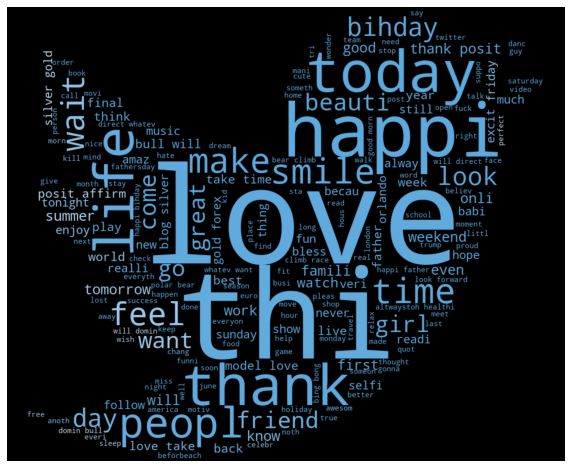

In [11]:
# Importing packaged necessary for generating a WordCloud
from wordcloud import WordCloud, ImageColorGenerator
from PIL import Image
import urllib
import requests

# Store all words which are positive with the label "0"
all_words_positive = " ".join(text for text in combine["Tidy_Tweets"][combine["label"]==0])

# Combine the image with the dataset
Mask = np.array(Image.open(requests.get("http://clipart-library.com/image_gallery2/Twitter-PNG-Image.png", stream=True).raw))

# Take tge cikir if the image and impose it over wordcloud
image_colors = ImageColorGenerator(Mask)

# Use the WordCloud function from the wordcloud library
wc = WordCloud(background_color="black", height=1500, width=4000, mask=Mask).generate(all_words_positive)

# Generate image size
plt.figure(figsize=(10, 20))

# Re-color the words to the image's color (re-colors the default colors)
# User interpolation to smooth the image generated
plt.imshow(wc.recolor(color_func=image_colors), interpolation="hamming")

plt.axis("off")
plt.show()

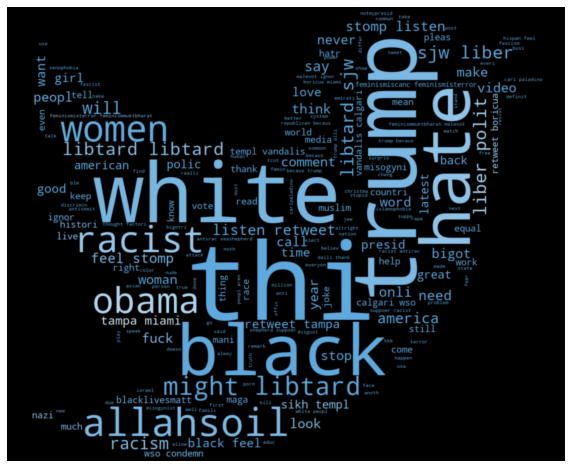

In [12]:
# Store all words which are negative with the label "1"
all_words_negative = " ".join(text for text in combine["Tidy_Tweets"][combine["label"]==1])

# Combine the image with the dataset
Mask = np.array(Image.open(requests.get("http://clipart-library.com/image_gallery2/Twitter-PNG-Image.png", stream=True).raw))

# Take tge cikir if the image and impose it over wordcloud
image_colors = ImageColorGenerator(Mask)

# Use the WordCloud function from the wordcloud library
wc = WordCloud(background_color="black", height=1500, width=4000, mask=Mask).generate(all_words_negative)

# Generate image size
plt.figure(figsize=(10, 20))

# Re-color the words to the image's color (re-colors the default colors)
# User interpolation to smooth the image generated
plt.imshow(wc.recolor(color_func=image_colors), interpolation="gaussian")

plt.axis("off")
plt.show()

In [13]:
# Function extract hashtags from tweets
def Hashtags_Extract(x):
    hashtags = []
    
    # Loop over the words in the tweet
    for i in x:
        ht = re.findall(r"#(\w+)", i)
        hashtags.append(ht)
        
    return hashtags

# Nested list of all the hashtags from positive reviews
ht_positive = Hashtags_Extract(combine["Tidy_Tweets"][combine["label"]==0])

ht_positive

[['run'],
 ['lyft', 'disapoint', 'getthank'],
 [],
 ['model'],
 ['motiv'],
 ['allshowandnogo'],
 [],
 ['school', 'exam', 'hate', 'imagin', 'actorslif', 'revolutionschool', 'girl'],
 ['allin', 'cav', 'champion', 'cleveland', 'clevelandcavali'],
 [],
 ['ireland', 'blog', 'silver', 'gold', 'forex'],
 ['orlando',
  'standwithorlando',
  'pulseshoot',
  'orlandoshoot',
  'biggerproblem',
  'selfish',
  'heabreak',
  'valu',
  'love'],
 ['gettingf'],
 ['got', 'junior', 'yugyoem', 'omg'],
 ['thank', 'posit'],
 ['friday', 'cooki'],
 [],
 ['euro'],
 ['badday', 'coneofsham', 'cat', 'piss', 'funni', 'laugh'],
 ['wine', 'weekend'],
 ['tgif', 'gamedev', 'indiedev', 'indiegamedev', 'squad'],
 ['upsideofflorida', 'shopalyssa', 'love'],
 ['smile', 'media', 'pressconfer', 'antalya', 'turkey', 'throwback'],
 ['ica'],
 [],
 ['rip', 'orlando'],
 [],
 ['alohafriday', 'time', 'not', 'exist', 'positivevib', 'hawaiian'],
 [],
 ['goodnight', 'badmonday'],
 ['taylorswift'],
 ['travelingram', 'dalat', 'ripinkyli

In [14]:
# Un-nest the list
ht_positive_unnest = sum(ht_positive, [])

ht_positive_unnest

['run',
 'lyft',
 'disapoint',
 'getthank',
 'model',
 'motiv',
 'allshowandnogo',
 'school',
 'exam',
 'hate',
 'imagin',
 'actorslif',
 'revolutionschool',
 'girl',
 'allin',
 'cav',
 'champion',
 'cleveland',
 'clevelandcavali',
 'ireland',
 'blog',
 'silver',
 'gold',
 'forex',
 'orlando',
 'standwithorlando',
 'pulseshoot',
 'orlandoshoot',
 'biggerproblem',
 'selfish',
 'heabreak',
 'valu',
 'love',
 'gettingf',
 'got',
 'junior',
 'yugyoem',
 'omg',
 'thank',
 'posit',
 'friday',
 'cooki',
 'euro',
 'badday',
 'coneofsham',
 'cat',
 'piss',
 'funni',
 'laugh',
 'wine',
 'weekend',
 'tgif',
 'gamedev',
 'indiedev',
 'indiegamedev',
 'squad',
 'upsideofflorida',
 'shopalyssa',
 'love',
 'smile',
 'media',
 'pressconfer',
 'antalya',
 'turkey',
 'throwback',
 'ica',
 'rip',
 'orlando',
 'alohafriday',
 'time',
 'not',
 'exist',
 'positivevib',
 'hawaiian',
 'goodnight',
 'badmonday',
 'taylorswift',
 'travelingram',
 'dalat',
 'ripinkylif',
 'photoshop',
 'enoughisenough',
 'dontph

In [15]:
# Nested list of all hashtags from negative reviews
ht_negative = Hashtags_Extract(combine["Tidy_Tweets"][combine["label"]==1])

ht_negative

[['cnn', 'michigan', 'tcot'],
 ['australia',
  'opkillingbay',
  'seashepherd',
  'helpcovedolphin',
  'thecov',
  'helpcovedolphin'],
 [],
 [],
 ['neverump', 'xenophobia'],
 ['love', 'peac'],
 [],
 ['race', 'ident', 'med'],
 ['altright', 'whitesupremaci'],
 ['linguist', 'race', 'power', 'raciolinguist'],
 ['brexit'],
 ['peopl', 'trump', 'republican'],
 ['michelleobama'],
 ['knick', 'golf'],
 ['jewishsupremacist'],
 ['libtard', 'sjw', 'liber', 'polit'],
 ['trash', 'hate'],
 [],
 [],
 ['stereotyp', 'prejudic', 'hope', 'hate', 'conflict'],
 ['pol', 'bluelivesmatt', 'draintheswamp', 'ferguson'],
 [],
 ['antisemit', 'hocoschool', 'columbiamd', 'hocomd'],
 ['nazi', 'hatr', 'bigotri'],
 ['libtard', 'sjw', 'liber', 'polit'],
 ['fyi', 'tcot'],
 ['topoli'],
 ['blacklivesmatt'],
 ['ushistori', 'eugen'],
 ['biher', 'bigotri', 'altright', 'potu', 'theresist'],
 ['crime', 'offic'],
 [],
 ['black', 'retweet', 'tampa', 'miami'],
 ['allahsoil'],
 [],
 ['prais', 'cleveland', 'rnc', 'white', 'tamirric',

In [16]:
# Un-nest the list
ht_negative_unnest = sum(ht_negative, [])

ht_negative_unnest

['cnn',
 'michigan',
 'tcot',
 'australia',
 'opkillingbay',
 'seashepherd',
 'helpcovedolphin',
 'thecov',
 'helpcovedolphin',
 'neverump',
 'xenophobia',
 'love',
 'peac',
 'race',
 'ident',
 'med',
 'altright',
 'whitesupremaci',
 'linguist',
 'race',
 'power',
 'raciolinguist',
 'brexit',
 'peopl',
 'trump',
 'republican',
 'michelleobama',
 'knick',
 'golf',
 'jewishsupremacist',
 'libtard',
 'sjw',
 'liber',
 'polit',
 'trash',
 'hate',
 'stereotyp',
 'prejudic',
 'hope',
 'hate',
 'conflict',
 'pol',
 'bluelivesmatt',
 'draintheswamp',
 'ferguson',
 'antisemit',
 'hocoschool',
 'columbiamd',
 'hocomd',
 'nazi',
 'hatr',
 'bigotri',
 'libtard',
 'sjw',
 'liber',
 'polit',
 'fyi',
 'tcot',
 'topoli',
 'blacklivesmatt',
 'ushistori',
 'eugen',
 'biher',
 'bigotri',
 'altright',
 'potu',
 'theresist',
 'crime',
 'offic',
 'black',
 'retweet',
 'tampa',
 'miami',
 'allahsoil',
 'prais',
 'cleveland',
 'rnc',
 'white',
 'tamirric',
 'rip',
 'bigot',
 'blacklivesmatt',
 'feminismiscanc

### For Positive Tweets in the dataset

In [17]:
# Count the frequency of words having a positive sentiment
word_freq_positive = nltk.FreqDist(ht_positive_unnest)

word_freq_positive

FreqDist({'love': 1654, 'posit': 917, 'smile': 676, 'healthi': 573, 'thank': 534, 'fun': 463, 'life': 425, 'affirm': 423, 'summer': 390, 'model': 375, ...})

In [18]:
# Create a dataframe for the most frequently used words in hashtags
df_positive = pd.DataFrame({"Hashtags":list(word_freq_positive.keys()),
                            "Count":list(word_freq_positive.values())})

df_positive.head(10)

,Hashtags,Count
0,run,72
1,lyft,2
2,disapoint,1
3,getthank,2
4,model,375
5,motiv,202
6,allshowandnogo,1
7,school,30
8,exam,9
9,hate,27


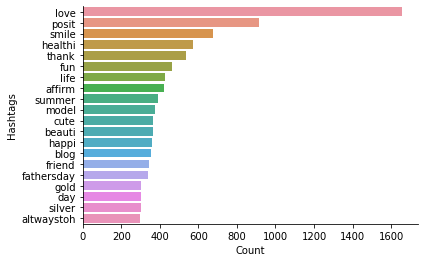

In [19]:
# Plotting a Bar-Plot for the 20 most frequent words used for hashtags
df_positive_plot = df_positive.nlargest(20, columns="Count")

sns.barplot(data=df_positive_plot, y="Hashtags", x="Count")
sns.despine()

### For Negative Tweets in the dataset

In [20]:
# Count the frequency of words having negative sentiment
word_freq_negative = nltk.FreqDist(ht_negative_unnest)

word_freq_negative

FreqDist({'trump': 136, 'polit': 95, 'allahsoil': 92, 'liber': 81, 'libtard': 77, 'sjw': 75, 'retweet': 63, 'black': 46, 'miami': 46, 'hate': 37, ...})

In [21]:
# Create a dataframe for the most frequently used words in hashtags
df_negative = pd.DataFrame({"Hashtags":list(word_freq_negative.keys()),
                            "Count":list(word_freq_negative.values())})

df_negative.head(10)

,Hashtags,Count
0,cnn,10
1,michigan,2
2,tcot,14
3,australia,6
4,opkillingbay,5
5,seashepherd,22
6,helpcovedolphin,3
7,thecov,4
8,neverump,8
9,xenophobia,12


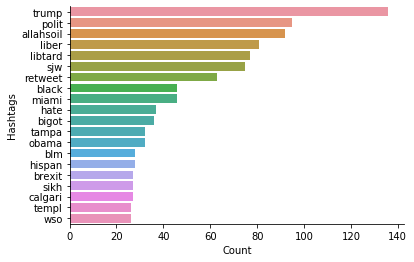

In [22]:
# Plotting a Bar-Plot for the 20 most frequent words used for hashtags
df_negative_plot = df_negative.nlargest(20, columns="Count")

sns.barplot(data=df_negative_plot, y="Hashtags", x="Count")
sns.despine()

# Feature Extraction techniques (via Word Embedding)

### Bag-of-Words Features
- Extracts features from text documents. These features can be used for training machine learning algorithms.
- Creates a vocabulary of all the unique words occurring in the training set.
- Approach
    - Given a collection of texts of documents and unqiue tokens (extracted out), tokens (words) will form a list
    - Each row in the bag-of-words matrix contains frequency of tokens in document (as training features)
    - Creates a vocabulary using unique words from all the documents
    - Number of occurence matter (not sequence or order of words)

In [23]:
from sklearn.feature_extraction.text import CountVectorizer

bow_vectorizer = CountVectorizer(max_df=0.90, min_df=2, 
                                   max_features=1000, stop_words="english")

# bag-of-words feature matrix
bow = bow_vectorizer.fit_transform(combine["Tidy_Tweets"])

df_bow = pd.DataFrame(bow.todense())
df_bow

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49154,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
49155,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
49156,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
49157,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### TF-IDF Features (Term Frequency-Inverse Document Frequency)
- TF-IDF's weight is often used in information retrieval and text mining
- Weight is a statistical measure used to evaluate how important a word is to a document in a collection of text
- Importance increases propportionally to the number of times a word appears in the document, but is offset by the frequency of the word
- Weight is composed of Term Frequency (TF) and Inverse Document Frequency (IDF)

    $$TF(term) = \frac{number\,of\,times\,term\,appears\,in\,a\,document}{total\,number\,of\,items\,in\,the\,document}$$

    $$IDF(term) = \log\Big(\frac{total\,number\,of\,documents}{number\,of\,documents\,with\,term\,in\,it}\Bigr)$$
    
    
- Formula for finding TF-IDF weight: $$TFIDF(term) = TF(term) * IDF(term)$$
$$w_{i,j} = tf_{ij}\,\times\,\log\Big(\frac{N}{df_i}\Bigr)$$
$$tf_{i,j} = number\,of\,occurrences\,of\,i\,in\,j$$
$$df_i = number\,of\,documents\,containing\,i$$
$$N = total\,number\,of\,documents$$

In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_df=0.90, min_df=2,
                        max_features=1000, stop_words="english")

# TF-IDF feature matrix
tfidf_matrix = tfidf.fit_transform(combine["Tidy_Tweets"])

df_tfidf = pd.DataFrame(tfidf_matrix.todense())
df_tfidf

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49154,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
49155,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
49156,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
49157,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Splitting dataset into Training and Validation Sets

In [25]:
# Using features from Bag-of-Words for training set
train_bow = bow[:31962]
train_bow.todense()

matrix([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]])

In [26]:
# Using features from TF-IDF for training set
train_tfidf_matrix = tfidf_matrix[:31962]
train_tfidf_matrix.todense()

matrix([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])

In [27]:
# Splitting data into training (labeled) and validation (unlabeled) sets
from sklearn.model_selection import train_test_split

# Using Bag-of-Words features
x_train_bow, x_valid_bow, y_train_bow, y_valid_bow = train_test_split(train_bow,
                                                                      train["label"],
                                                                      test_size=0.3,
                                                                      random_state=2)

# Using TF-IDF features
x_train_tfidf, x_valid_tfidf, y_train_tfidf, y_valid_tfidf = train_test_split(train_tfidf_matrix,
                                                                              train["label"],
                                                                              test_size=0.3,
                                                                              random_state=17)

# Applying Machine Learning Models

### Supervised Learning
- We know the correct answers, the algorithm iteratively makes predictions on the training data and is corrected by a human
- Learning stops when algorithm achieves an acceptable level of performance
- Uses an algorithm to learn the mapping function from input variables (X) to output variables (Y)
$$Y = f(x)$$
- Goal: approximate the mapping function so well that when given new inpurt data (x), can predict the output variables (y) for that data
- Supervised learning problems can be grouped into Regression and Classification problems
    - Regression: output variable (Y) is a real value
    - Classification: output variable (Y) is a category
    
### Supervised Learning Models (to predict results of test data)
- Logistic Regression
- XGBoost
- Decision Trees

### Using Logistic Regression model

In [28]:
# Importing Logistic Regression model
from sklearn.linear_model import LogisticRegression

Log_Reg = LogisticRegression(random_state=0, solver="lbfgs")

# Applying the model on dataset using Bag-of-Words features
#... fitting the model
Log_Reg.fit(x_train_bow, y_train_bow)

#... predicting the probabilities
prediction_bow = Log_Reg.predict_proba(x_valid_bow)
prediction_bow

array([[9.86501156e-01, 1.34988440e-02],
       [9.99599096e-01, 4.00904144e-04],
       [9.13577383e-01, 8.64226167e-02],
       ...,
       [8.95457155e-01, 1.04542845e-01],
       [9.59736065e-01, 4.02639345e-02],
       [9.67541420e-01, 3.24585797e-02]])

In [29]:
# Importing F1 Score to assess model's performance (instead of accuracy)
from sklearn.metrics import f1_score
 
# If prediction is >= 0.3 then sentiment is 1 (negative), else 0 (positive)
prediction_int = prediction_bow[:,1] >= 0.3

# Converting the results to integer type
prediction_int = prediction_int.astype(np.int)

# Calculating F1 score
log_bow = f1_score(y_valid_bow, prediction_int)
log_bow

0.5721352019785655

In [30]:
# Applying the model on dataset using TF-IDF features
#... fitting the model
Log_Reg.fit(x_train_tfidf, y_train_tfidf)

#... predicting the probabilities
prediction_tfidf = Log_Reg.predict_proba(x_valid_tfidf)
prediction_tfidf

array([[0.98487907, 0.01512093],
       [0.97949889, 0.02050111],
       [0.9419737 , 0.0580263 ],
       ...,
       [0.98630906, 0.01369094],
       [0.96746188, 0.03253812],
       [0.99055287, 0.00944713]])

In [31]:
# If prediction is >= 0.3 then sentiment is 1 (negative), else 0 (positive)
prediction_int = prediction_tfidf[:,1] >= 0.3

# Converting the results to integer type
prediction_int = prediction_int.astype(np.int)

# Calculating F1 score
log_tfidf = f1_score(y_valid_tfidf, prediction_int)
log_tfidf

0.5862068965517241

### Using XGBoost model

In [32]:
# Importing XGBoost model
from xgboost import XGBClassifier

model_bow = XGBClassifier(random_state=22, learning_rate=0.9)

# Applying the model on dataset using Bag-of-Words features
#... fitting the model
model_bow.fit(x_train_bow, y_train_bow)

#... predicting the probabilities
xgb = model_bow.predict_proba(x_valid_bow)
xgb

array([[0.9717447 , 0.02825526],
       [0.9976769 , 0.00232312],
       [0.9436968 , 0.0563032 ],
       ...,
       [0.9660848 , 0.03391521],
       [0.9436968 , 0.0563032 ],
       [0.9436968 , 0.0563032 ]], dtype=float32)

In [33]:
# If prediction is >= 0.3 then sentiment is 1 (negative), else 0 (positive)
xgb = xgb[:,1] >= 0.3

# Converting the results to integer type
xgb_int = xgb.astype(np.int)

# Calculating F1 score
xgb_bow = f1_score(y_valid_bow, xgb_int)
xgb_bow

0.5712012728719172

In [34]:
model_tfidf = XGBClassifier(random_state=29, learning_rate=0.7)

# Applying the model on dataset using TF-IDF features
#... fitting the model
model_tfidf.fit(x_train_tfidf, y_train_tfidf)

#... predicting the probabilities
xgb_tfidf = model_tfidf.predict_proba(x_valid_tfidf)
xgb_tfidf

array([[0.9905174 , 0.00948263],
       [0.9902541 , 0.00974591],
       [0.95791286, 0.04208714],
       ...,
       [0.9883729 , 0.0116271 ],
       [0.9878232 , 0.0121768 ],
       [0.9807036 , 0.01929643]], dtype=float32)

In [35]:
# If prediction is >= 0.3 then sentiment is 1 (negative), else 0 (positive)
xgb_tfidf = xgb_tfidf[:,1] >= 0.3

# Converting the results to integer type
xgb_int_tfidf = xgb_tfidf.astype(np.int)

# Calculating F1 score
score = f1_score(y_valid_tfidf, xgb_int_tfidf)
score

0.5657051282051281

### Using Decision Trees model

In [36]:
# Importing Decision Trees model
from sklearn.tree import DecisionTreeClassifier

dct = DecisionTreeClassifier(criterion="entropy", random_state=1)

# Applying the model on dataset using Bag-of-Words features
#... fitting the model
dct.fit(x_train_bow, y_train_bow)

#... predicting the probabilities
dct_bow = dct.predict_proba(x_valid_bow)
dct_bow

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])

In [37]:
# If prediction is >= 0.3 then sentiment is 1 (negative), else 0 (positive)
dct_bow = dct_bow[:,1] >= 0.3

# Converting the results to integer type
dct_int_bow = dct_bow.astype(np.int)

# Calculating F1 score
dct_score_bow = f1_score(y_valid_bow, dct_int_bow)
dct_score_bow

0.5141776937618148

In [38]:
# Applying the model on dataset using TF-IDF features
#... fitting the model
dct.fit(x_train_tfidf, y_train_tfidf)

#... predicting the probabilities
dct_tfidf = dct.predict_proba(x_valid_tfidf)
dct_tfidf

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])

In [39]:
# If prediction is >= 0.3 then sentiment is 1 (negative), else 0 (positive)
dct_tfidf = dct_tfidf[:,1] >= 0.3

# Converting the results to integer type
dct_int_tfidf = dct_tfidf.astype(np.int)

# Calculating F1 score
dct_score_tfidf = f1_score(y_valid_tfidf, dct_int_tfidf)
dct_score_tfidf

0.5498821681068342

# Model Comparison

### Bag-of-Words

In [40]:
Algo_1 = ["LogisticRegression(Bag-of-Words)", "XGBoost(Bag-of-Words)", "DecisionTree(Bag-of-Words)"]

score_1 = [log_bow, xgb_bow, dct_score_bow]

compare_1 = pd.DataFrame({"Model":Algo_1, "F1_Score":score_1},
                          index=[i for i in range(1,4)])
compare_1.T

,1,2,3
Model,LogisticRegression(Bag-of-Words),XGBoost(Bag-of-Words),DecisionTree(Bag-of-Words)
F1_Score,0.572135,0.571201,0.514178


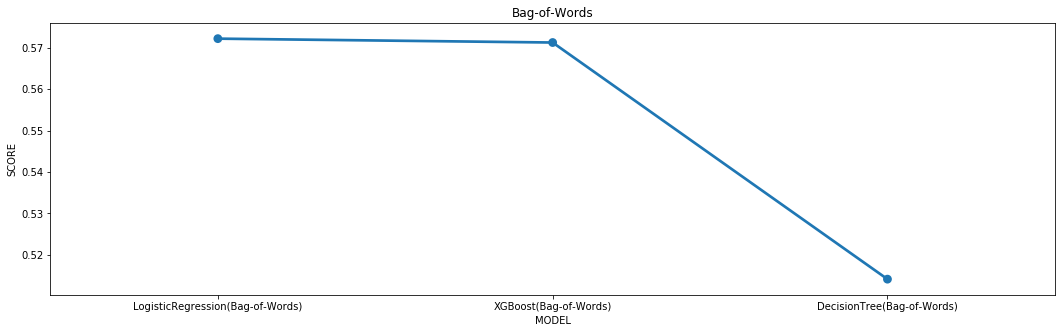

In [41]:
# Comparison Graph
plt.figure(figsize=(18,5))

sns.pointplot(x="Model", y="F1_Score", data=compare_1)

plt.title("Bag-of-Words")
plt.xlabel("MODEL")
plt.ylabel("SCORE")
plt.show()

### TF-IDF

In [42]:
Algo_2 = ["LogisticRegression(TF-IDF)", "XGBoost(TF-IDF)", "DecisionTree(TF-IDF)"]

score_2 = [log_tfidf, score, dct_score_tfidf]

compare_2 = pd.DataFrame({"Model":Algo_2, "F1_Score":score_2},
                          index=[i for i in range(1,4)])
compare_2.T

,1,2,3
Model,LogisticRegression(TF-IDF),XGBoost(TF-IDF),DecisionTree(TF-IDF)
F1_Score,0.586207,0.565705,0.549882


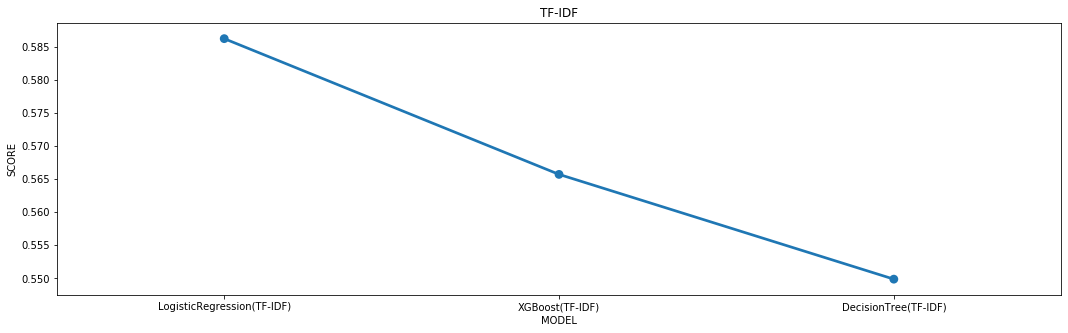

In [43]:
# Comparison Graph
plt.figure(figsize=(18,5))

sns.pointplot(x="Model", y="F1_Score", data=compare_2)

plt.title("TF-IDF")
plt.xlabel("MODEL")
plt.ylabel("SCORE")
plt.show()

### Observations
- Best possible model from both Bag-of-Words and TF-IDF is Logistic Regression

### Compare the score of Logistic Regression model 

In [44]:
Algo_best = ["LogisticRegression(Bag-of-Words)", "LogisticRegression(TF-IDF)"]

score_best = [log_bow, log_tfidf]

compare_best = pd.DataFrame({"Model":Algo_best, "F1_Score":score_best},
                          index=[i for i in range(1,3)])
compare_best.T

,1,2
Model,LogisticRegression(Bag-of-Words),LogisticRegression(TF-IDF)
F1_Score,0.572135,0.586207


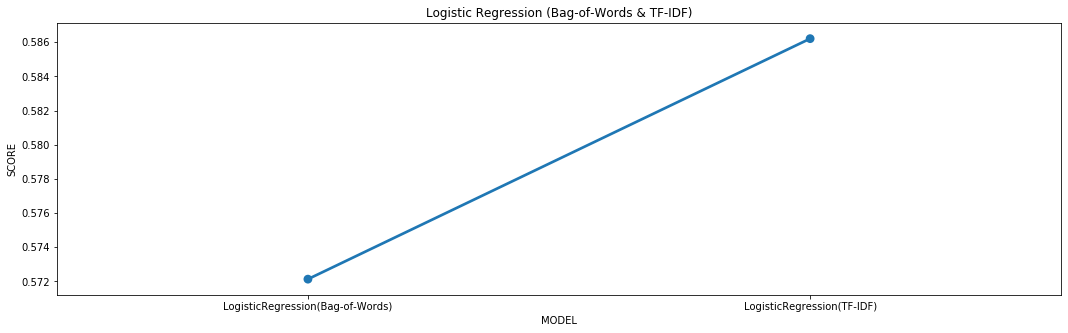

In [45]:
# Comparison Graph for Logistic Regression model
plt.figure(figsize=(18,5))

sns.pointplot(x="Model", y="F1_Score", data=compare_best)

plt.title("Logistic Regression (Bag-of-Words & TF-IDF)")
plt.xlabel("MODEL")
plt.ylabel("SCORE")
plt.show()

### Predicting results for test data
- Since best possible F1 Score is obtained by Logistic Regression model using TF-IDF features

In [46]:
test_tfidf = tfidf_matrix[31962:]
test_pred = Log_Reg.predict_proba(test_tfidf)

test_pred_int = test_pred[:,1] >= 0.3
test_pred_int = test_pred_int.astype(np.int)

test["label"] = test_pred_int

submission = test[["id", "label"]]
submission.to_csv("result.csv", index=False)

# Results after prediction
res = pd.read_csv("result.csv")
res

,id,label
0,31963,0
1,31964,0
2,31965,0
3,31966,0
4,31967,0
...,...,...
17192,49155,1
17193,49156,0
17194,49157,0
17195,49158,0


### F1 Score vs Accuracy
$$Accuracy = \frac{True\,Positive\,+\,True\,Negative}{Total}$$

- **Precision**: percentage of results which are relevant

$$Precision = \frac{True\,Positive}{Actual\,Results}$$ 
or 
$$Precision = \frac{True\,Positive}{True\,Positive\,+\,False\,Negative}$$


- **Recall**: percentage of total relevant results correctly classified by algorithm

$$Recall = \frac{True\,Positive\,+\,True\,Negative}{Total}$$

- Notes
    - High **Precision** gives low **Recall**, and vice versa
    - In most problems, can either give a higher priority to maximum precision, or recall (depending on the problem)
    
- **F1 Score**: takes into account both precision and recall (only have to maximize one score, rather than balancing two separate scores)

$$F1 Score = 2\,*\,\frac{Precision\,*\,Recall}{Precision\,+\,Recall}$$